In [19]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [25]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x)
    #b1 = np.random.randn(n_h, 1)
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)
    b2 = np.random.randn(n_y, 1)
    b2 = np.zeros((n_y, 1))

    parameters = {
        "W1": W1,
        "b1" : b1,
        "W2": W2,
        "b2" : b2
    }
    return parameters

In [26]:
def forward_prop(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {
        "A1": A1,
        "A2": A2
    }
    return A2, cache

In [27]:
def calculate_cost(A2, Y):
    cost = -np.sum(np.multiply(Y, np.log(A2)) +  np.multiply(1-Y, np.log(1-A2)))/m
    cost = np.squeeze(cost)

    return cost

In [28]:
def backward_prop(X, Y, cache, parameters):
    A1 = cache["A1"]
    A2 = cache["A2"]

    W2 = parameters["W2"]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m

    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return grads

In [29]:
def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    new_parameters = {
        "W1": W1,
        "W2": W2,
        "b1" : b1,
        "b2" : b2
    }

    return new_parameters

In [33]:
import matplotlib.pyplot as plt

def model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate):
    parameters = initialize_parameters(n_x, n_h, n_y)
    costs = []  # Lista para almacenar el costo en cada iteración

    for i in range(0, num_of_iters+1):
        a2, cache = forward_prop(X, parameters)

        cost = calculate_cost(a2, Y)
        costs.append(cost)  # Agregar el costo a la lista

        grads = backward_prop(X, Y, cache, parameters)

        parameters = update_parameters(parameters, grads, learning_rate)

        if(i%100 == 0):
            print('Cost after iteration# {:d}: {:f}'.format(i, cost))

    # Graficar el costo por iteración
    plt.plot(range(num_of_iters+1), costs)
    plt.xlabel('Iteración')
    plt.ylabel('Costo')
    plt.title('Costo por iteración')
    plt.show()

    return parameters


In [31]:
def predict(X, parameters):
    a2, cache = forward_prop(X, parameters)
    yhat = a2
    yhat = np.squeeze(yhat)
    if(yhat >= 0.5):
        y_predict = 1
    else:
        y_predict = 0

    return y_predict

Cost after iteration# 0: 0.856267
Cost after iteration# 100: 0.141350
Cost after iteration# 200: 0.046247
Cost after iteration# 300: 0.027016
Cost after iteration# 400: 0.018972
Cost after iteration# 500: 0.014584
Cost after iteration# 600: 0.011830
Cost after iteration# 700: 0.009944
Cost after iteration# 800: 0.008573
Cost after iteration# 900: 0.007531
Cost after iteration# 1000: 0.006714


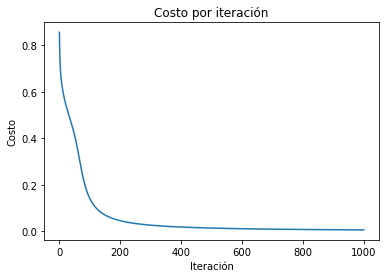

{'W1': array([[ 3.36243112, -3.23921699],
       [-3.62709124,  3.74377535]]), 'W2': array([[-5.59814503, -5.54874364]]), 'b1': array([[1.54485126],
       [1.74702985]]), 'b2': array([[5.03778435]])}
Neural Network prediction for example (1, 0) is 1


In [42]:
np.random.seed(2)

# The 4 training examples by columns
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])

# The outputs of the XOR for every example in X
Y = np.array([[0, 1, 1, 0]])

# No. of training examples
m = X.shape[1]

# Set the hyperparameters
n_x = 2     #No. of neurons in first layer
n_h = 2     #No. of neurons in hidden layer
n_y = 1     #No. of neurons in output layer
num_of_iters = 1000
learning_rate = 0.5

trained_parameters = model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate)

# Test 2X1 vector to calculate the XOR of its elements. 
# Try (0, 0), (0, 1), (1, 0), (1, 1)
X_test = np.array([[1], [0]])

print(trained_parameters)

y_predict = predict(X_test, trained_parameters)

print('Neural Network prediction for example ({:d}, {:d}) is {:d}'.format(
    X_test[0][0], X_test[1][0], y_predict))